In [ ]:
#前提:profitをdependent variable、残りをindependent variableとしたa multiple regression (R&D, Adm, etc)

import numpy as np
import pandas as pd

#Reading data
data = pd.read_csv('1000_Companies.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
#Stateがnumberじゃないからnumberにする
data = pd.get_dummies(data)
print (data.head())



# Drops the 'Profit' column from the features
# dropでは、original dataはmodifyしてないから下記でyをprofit出来る
X = data.drop(columns=['Profit'])

# Selects the 'Profit' column as the target variable
y = data.iloc[:, 3]


   R&D Spend  Administration  Marketing Spend     Profit  State_California  \
0  165349.20       136897.80        471784.10  192261.83                 0   
1  162597.70       151377.59        443898.53  191792.06                 1   
2  153441.51       101145.55        407934.54  191050.39                 0   
3  144372.41       118671.85        383199.62  182901.99                 0   
4  142107.34        91391.77        366168.42  166187.94                 0   

   State_Florida  State_New York  
0              0               1  
1              0               0  
2              1               0  
3              0               1  
4              1               0  


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
print (y_pred)
y_test.head()

[ 89790.61532916  88427.07187361  94894.67836972 175680.8672561
  83411.73042089 110571.90200074 132145.2293644   91473.37719687
 164597.05380606  53222.82667401  66950.1905099  150566.43987004
 126915.20858596  59337.85971051 177513.91053061  75316.28143051
 118248.14406603 164574.40699901 170937.28981069 182069.11645084
 118845.03252689  85669.95112229 180992.59396143  84145.08220145
 105005.83769214 101233.56772747  53831.07669092  56881.41475225
  68896.39346905 210040.00765883 120778.72270894 111724.87157654
 101487.90541518 137959.02649623  63969.95996744 108857.91214126
 186014.72531987 171442.64130747 174644.26529204 117671.49128195
  96731.37857434 165452.25779409 107724.34331255  50194.54176914
 116513.89532178  58632.48986821 158416.46827609  78541.4852161
 159727.66671743 131137.87699644 184880.70924515 174609.08266879
  93745.66352059  78341.13383418 180745.90439079  84461.61490552
 142900.90602902 170618.44098396  84365.09530839 105307.3716218
 141660.07290786  52527.3434

993     89012.02672
859     87654.55773
298     94093.35179
553    175396.26160
672     83356.61784
Name: Profit, dtype: float64

In [ ]:
#今回のa multiple regressionにおいて何が起きているかを確認
#a multiple regressionだから公式的には以下で表される
#y(dependent) = b0 (y切片) + b1・x1 (x1はindependent) + b2・x2 (x2はindependent) + b3・x3 (x3はindependent)
#だからinterceptはb0というひとつの値、coefficientはbnというcolumn毎の値を出す
#interceptがひとつしかないのにcoefficientが複数なのは、a multiple regressionは平面だから

#Calculating the Coefficients それぞれcolumnに対応するslopeだから複数 (順番はcolumn順)
print(regressor.coef_)

#Calculating the Intercept
print(regressor.intercept_)

#Calculating the R^2 (real profitとpredict profitとの差のR^2)(each columnにおけるR^2のaverageとかじゃない、今回はa multiple regressionだから複雑だから)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #これはなかなか信憑性あるprediction

[ 5.25845857e-01  8.44390881e-01  1.07574255e-01  5.26235224e+02
 -3.54301375e+02 -1.71933849e+02]
-51561.464947771135


0.9112695892268795

In [ ]:
#おまけ
#[:,:-1]
#X = data.iloc[:,:-1]
#ちなみにXに関して、iloc[:,:-1]の:-1はlast column以外を抽出だから、[:,:4]の代わりにそれでも良い

<Axes: >

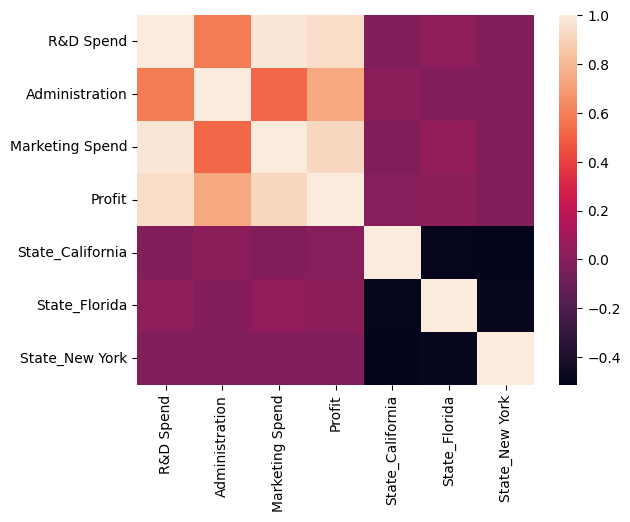

In [ ]:
#おまけ
#Data Visualization
#Building the Correlation Matrix
import seaborn as sns
sns.heatmap(data.corr())